In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [63]:
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv('weather_clean.csv', delimiter=',', parse_dates=True, index_col='Date Time')
df.shape

(420768, 14)

In [65]:
df = df.drop('Tpot (K)', axis=1)
df = df.drop('max. wv (m/s)', axis=1)

In [66]:
df.head()

,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,152.3
2009-01-01 00:20:00,996.57,-8.41,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,136.1
2009-01-01 00:30:00,996.53,-8.51,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,171.6
2009-01-01 00:40:00,996.51,-8.31,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,198.0
2009-01-01 00:50:00,996.51,-8.27,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,214.3


In [67]:
# 1) sum up temp by days
# 2) split up datetime into features
# 3) separate target from features
# 4) convert to arrays
# 5) split train, test 
# 6) train and predict

In [68]:
total_days = 6*365 + 2*366
total_days

2922

In [69]:
# TODO make use of pd.timedelta
df_mean_by_days = pd.DataFrame(columns=df.columns)
# df.insert(0, 'date_time', df.index)

time_format = '%Y-%m-%d'
start_day = datetime.strptime('2009-01-01', time_format)
for i in range(2922):
    current_day = start_day + timedelta(days=i)
    current_day = current_day.strftime(time_format)
    
    mean_row = df.loc[current_day].mean()
    mean_row['year'], mean_row['month'], mean_row['day'] = [float(x) for x in current_day.split('-')]
    df_mean_by_days = df_mean_by_days.append(mean_row, ignore_index=True)

In [70]:
df_mean_by_days.head()

,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),wd (deg),day,month,year
0,999.145594,-6.810629,-8.015594,91.086014,3.691119,3.355524,0.335315,2.091049,3.357832,1305.178252,0.778601,181.863077,1.0,1.0,2009.0
1,985.760694,-3.360486,-5.751597,83.506944,4.766875,3.975486,0.790833,2.512500,4.033611,1270.863125,3.938819,44.648750,2.0,1.0,2009.0
2,984.868264,5.435694,3.269583,86.875764,9.143681,7.744792,1.397639,4.906389,7.863819,1227.955833,2.233819,173.602083,3.0,1.0,2009.0
3,993.855069,7.283889,-0.283611,61.858472,10.779028,6.000764,4.778264,3.764097,6.037569,1232.163125,2.840764,80.935417,4.0,1.0,2009.0
4,994.080972,12.690069,9.444444,81.556806,15.005556,11.882778,3.123056,7.469097,11.953056,1206.159792,1.567778,139.180625,5.0,1.0,2009.0


In [71]:
# separate features from target
target = df_mean_by_days['T (degC)']
features = df_mean_by_days.drop('T (degC)', axis=1)

In [72]:
# make an offset of one day to predict next day mean temp based on day features
target = target.drop(0)
target = target.reset_index(drop=True)

features = features.drop(2921)
features = features.reset_index(drop=True)

# check
features.shape[0] == target.shape[0]

True

In [73]:
# train test split
train_features, test_features = features.iloc[:-365], features.iloc[-365:]
train_target, test_target = target.iloc[:-365], target.iloc[-365:]

In [74]:
# convert features and target to arrays
columns = features.columns.tolist()

train_features = np.asarray(train_features, dtype=np.float32)
train_target = np.asarray(train_target, dtype=np.float32)
test_features = np.asarray(test_features, dtype=np.float32)
test_target = np.asarray(test_target, dtype=np.float32)

In [75]:
import wandb

In [76]:
wandb.init(project="weather_random_forest")

W&B Run: https://app.wandb.ai/julia678/weather_random_forest/runs/8yn3ihdx

In [77]:
wandb.config.seed = 42
wandb.config.n_estimators = 100

In [78]:
train_features.shape[0] == train_target.shape[0]
test_features.shape[0] == test_target.shape[0]

True

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf = RandomForestRegressor(n_estimators = wandb.config.n_estimators, 
                           random_state = wandb.config.seed)
rf.fit(train_features, train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [81]:
wandb.log({"Train Accuracy": rf.score(train_features, train_target),
           "Test Accuracy": rf.score(test_features, test_target)})

Variable: VPmax (mbar)         Importance: 0.61
Variable: day                  Importance: 0.19
Variable: wd (deg)             Importance: 0.03
Variable: year                 Importance: 0.03
Variable: p (mbar)             Importance: 0.02
Variable: rho (g/m**3)         Importance: 0.02
Variable: wv (m/s)             Importance: 0.02
Variable: month                Importance: 0.02
Variable: Tdew (degC)          Importance: 0.01
Variable: rh (%)               Importance: 0.01
Variable: VPact (mbar)         Importance: 0.01
Variable: VPdef (mbar)         Importance: 0.01
Variable: sh (g/kg)            Importance: 0.01
Variable: H2OC (mmol/mol)      Importance: 0.01


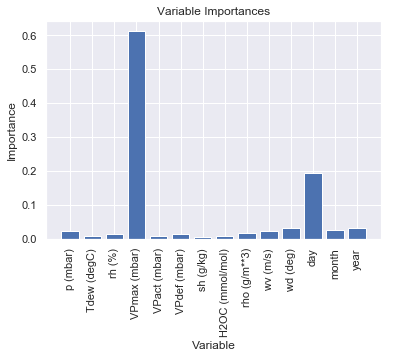

In [82]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [83]:
from sklearn.metrics import mean_absolute_error as mae
predictions = rf.predict(test_features)
mae(test_target, predictions)

2.736077843700555

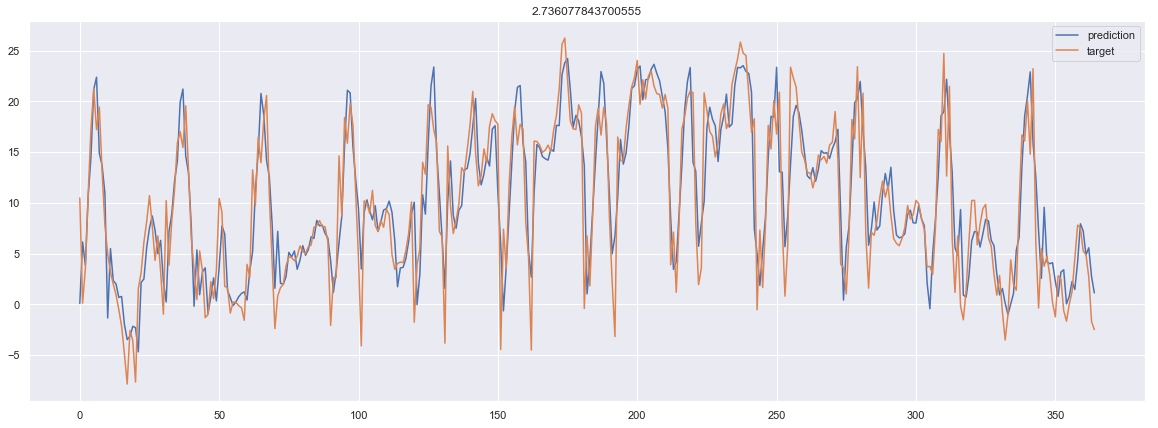

In [85]:
plt.figure(figsize=(20, 7))
plt.plot(predictions, label='prediction')
plt.plot(test_target, label='target')
plt.title(mae(test_target, predictions))
plt.legend()
plt.grid(True)
plt.show()